### Imports

In [1]:
import keras as ker
# Import the imbd-dataset - movie reviews from the Internet Movie Database
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
# number of most frequently used words taken
n = 5000 #10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=n)

In [3]:
# Decoding the review
word_index = imdb.get_word_index()
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### Preparing the data
The lists of intergers need to be turned into tensors. We will one-hot encode the lists to turn them into vectors of 0s and 1s.

In [4]:
def vectorize_sequences(sequences, dimension=n):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(len(x_test))

25000


### Architecture 

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(n,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Loss function & optimizer
A binary crossentropy will work here, since our output is a probability. As for the optimizer we choose rmsprop.

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

We can configure the parameters of the optimizer or pass a custom loss function or metric function in the following way:

In [7]:
# from keras import optimizers
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

### Creating a validation set
To properly understand the distinction between a validation dataset and test dataset read this post https://machinelearningmastery.com/difference-test-validation-datasets/.

In [8]:
x_val = x_train[:n]
partial_x_train = x_train[n:]
y_val = y_train[:n]
partial_y_train = y_train[n:]

### Training

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 1536/20000 [=>............................] - ETA: 2:46 - loss: 0.6911 - acc: 0.5534

C:\Users\Theo\Anaconda3\envs\tensorflow-sessions\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187819). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


20000/20000 [==============================] - 27s 1ms/step - loss: 0.5130 - acc: 0.7954 - val_loss: 0.3959 - val_acc: 0.8628
Epoch 2/20
20000/20000 [==============================] - 3s 125us/step - loss: 0.3188 - acc: 0.8903 - val_loss: 0.3062 - val_acc: 0.8806
Epoch 3/20
20000/20000 [==============================] - 2s 114us/step - loss: 0.2513 - acc: 0.9100 - val_loss: 0.2838 - val_acc: 0.8864
Epoch 4/20
20000/20000 [==============================] - 2s 111us/step - loss: 0.2175 - acc: 0.9200 - val_loss: 0.2830 - val_acc: 0.8908
Epoch 5/20
20000/20000 [==============================] - 2s 104us/step - loss: 0.1959 - acc: 0.9275 - val_loss: 0.2985 - val_acc: 0.8864
Epoch 6/20
20000/20000 [==============================] - 2s 103us/step - loss: 0.1806 - acc: 0.9333 - val_loss: 0.3019 - val_acc: 0.8816
Epoch 7/20
20000/20000 [==============================] - 2s 104us/step - loss: 0.1677 - acc: 0.9388 - val_loss: 0.3207 - val_acc: 0.8754
Epoch 8/20
20000/20000 [======================

### Plotting the training and validation loss
Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened
during training.

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history #Alternatively, it would makse sense to call this "loss."
#history_dict.keys()

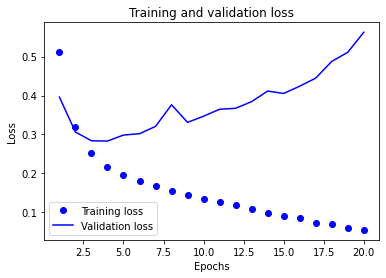

In [28]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy 

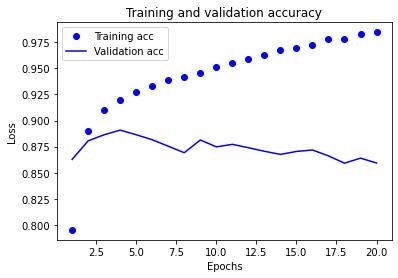

In [32]:
val_acc_values = history_dict['val_acc']
acc = history_dict['acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Of course, with the training loss / accuracy, we see a steady decrease / increase. However, the validation loss and accuracy jump around. This is because a model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. The model may become overfitted to the training data, in such a way that it does not generalize to the validation set. 

### Making predictions on new data

To make predictions on the test_data we use the predict method.

In [13]:
model.predict(x_test)

array([[0.03961685],
       [1.        ],
       [0.9969261 ],
       ...,
       [0.13616139],
       [0.01945108],
       [0.9819488 ]], dtype=float32)

range(1, 21)
